In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# Load datasets
fg_df = pd.read_csv("/content/drive/MyDrive/fear_greed_index.csv")
trades_df = pd.read_csv("/content/drive/MyDrive/historical_data.csv")

In [5]:
# Convert dates to datetime format
fg_df['date'] = pd.to_datetime(fg_df['date'])
# Convert 'Timestamp IST' to datetime using the correct format
trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date
trades_df['date'] = pd.to_datetime(trades_df['date'])  # Ensure datetime type

In [6]:
# Merge datasets on date
merged_df = pd.merge(trades_df, fg_df[['date', 'classification']], on='date', how='inner')


<ipython-input-7-e5f34754a9f5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fg_df, x='classification', palette='viridis')


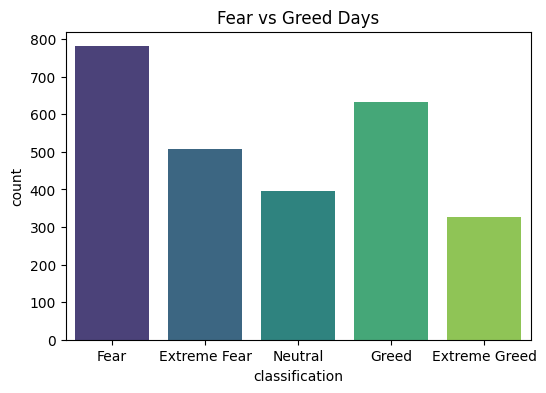

In [7]:
# EDA
# 1. Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=fg_df, x='classification', palette='viridis')
plt.title("Fear vs Greed Days")
plt.show()

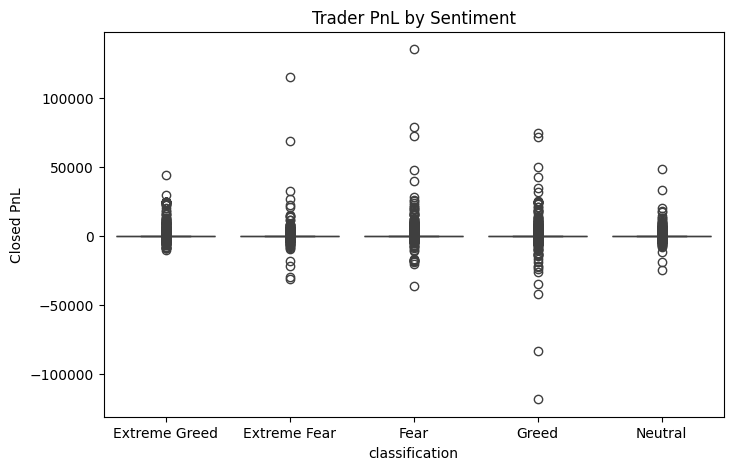

In [8]:
# 2. PnL distribution by sentiment
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Trader PnL by Sentiment")
plt.show()

In [13]:
# 3. Average stats by sentiment
agg_stats = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'std'],
    'Size USD': 'mean',
    'Execution Price': 'mean',
    'Fee': 'mean'
}).round(2)
print("\n Average Stats by Sentiment:\n", agg_stats)


 Average Stats by Sentiment:
                Closed PnL          Size USD Execution Price   Fee
                     mean      std     mean            mean  mean
classification                                                   
Extreme Fear        34.54  1136.06  5349.73         7054.80  1.12
Extreme Greed       67.89   766.83  3112.25         6082.20  0.68
Fear                54.29   935.36  7816.11        14152.62  1.50
Greed               42.74  1116.03  5736.88        13411.28  1.25
Neutral             34.31   517.12  4782.73        12393.69  1.04


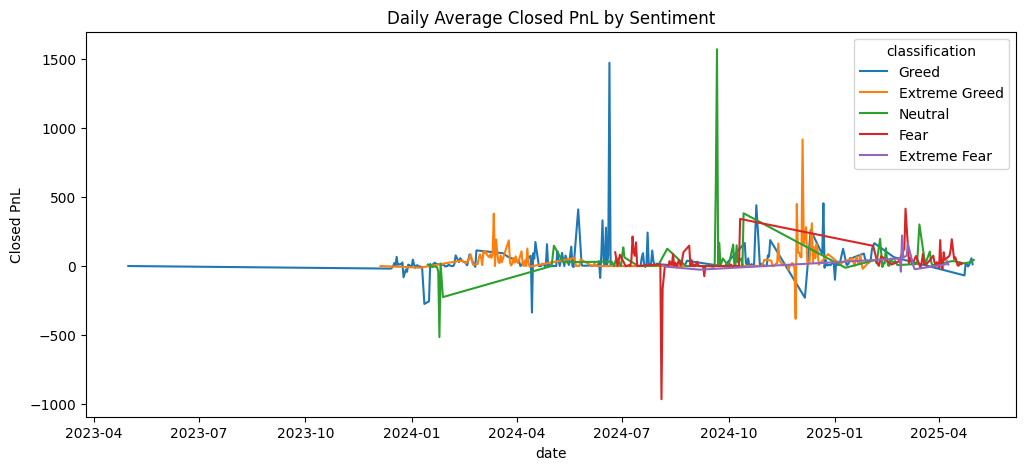

In [10]:
# 4. Daily average PnL trend
daily_pnl = merged_df.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=daily_pnl, x='date', y='Closed PnL', hue='classification')
plt.title("Daily Average Closed PnL by Sentiment")
plt.show()

In [12]:
# STATISTICAL ANALYSIS
# -------------------------------

# T-test on Closed PnL for Fear vs Greed days
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Closed PnL']
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Closed PnL']

t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"\n T-test on Closed PnL (Fear vs Greed):")
print(f"  t-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")
if p_val < 0.05:
    print("  Significant difference in trader PnL between Fear and Greed days.")
else:
    print("   No significant difference in trader PnL between Fear and Greed days.")


 T-test on Closed PnL (Fear vs Greed):
  t-statistic = 1.851, p-value = 0.06415
   No significant difference in trader PnL between Fear and Greed days.


Output Summary
Count of Fear vs. Greed days

Boxplots comparing trader PnL by sentiment

Aggregated statistics: average PnL, trade size, fees

Time series of daily PnL

T-test to statistically compare performance across sentiments


